# 102.4. Retrieve a TAP job by URL

<div>
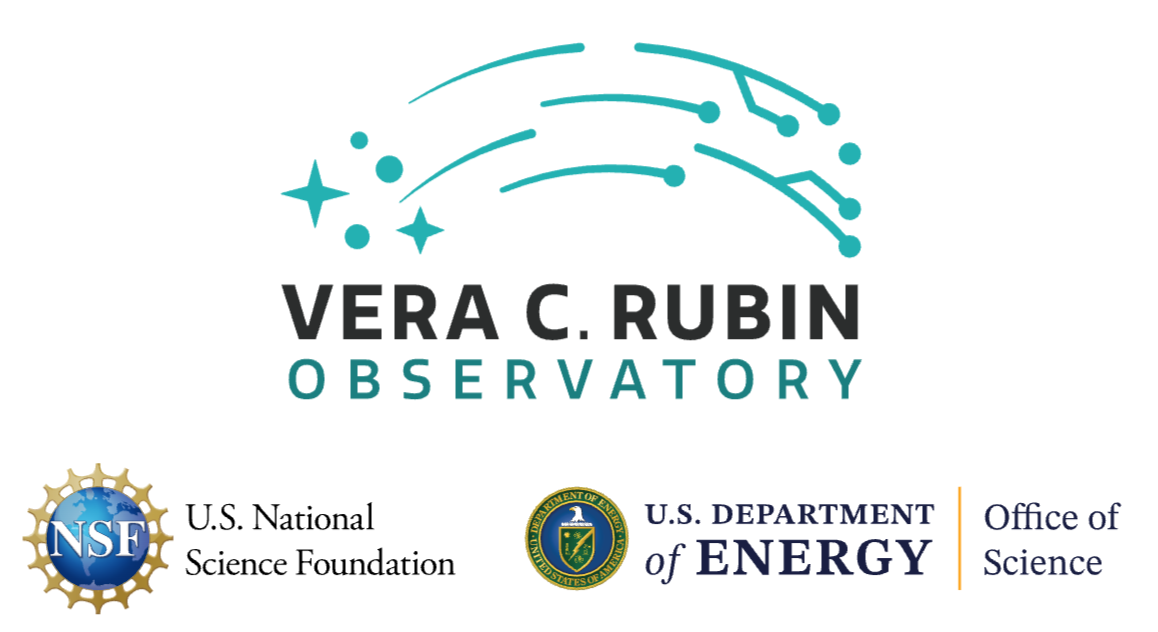
</div>
For the Rubin Science Platform at data.lsst.cloud. <br>
Data Release: <a href="https://dp1.lsst.io">Data Preview 1</a> <br>
Container Size: large <br>
LSST Science Pipelines version: r29.1.1 <br>
Last verified to run: 2025-06-25 <br>
Repository: <a href="https://github.com/lsst/tutorial-notebooks">github.com/lsst/tutorial-notebooks</a> <br>

**Learning objective:** How to use the TAP service's job URLs.

**LSST data products:** `Object` table

**Packages:** `lsst.rsp.get_tap_service` and `retrieve_query`

**Credit:** Originally developed by the Rubin Community Science team.
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Everyone is encouraged to ask questions or raise issues in the 
<a href="https://community.lsst.org/c/support">Support Category</a> 
of the Rubin Community Forum.
Rubin staff will respond to all questions posted there.

## 1. Introduction

TAP provides standardized access to catalog data for discovery, search, and retrieval.
Full [documentation for TAP](http://www.ivoa.net/documents/TAP) is provided by the
International Virtual Observatory Alliance (IVOA).

**Related tutorials**: The other 100-level tutorials in this series demonstrate how to use the TAP service. The 200-level tutorials describe the contents of the catalog data.

### 1.1. Import packages

Import the RSP TAP service.

In [ ]:
from lsst.rsp import get_tap_service, retrieve_query

### 1.2. Define parameters

Get an instance of the TAP service, and assert that it exists.

In [ ]:
service = get_tap_service("tap")
assert service is not None

## 2. The job URL

Job results are generally available from previously run queries,
and can be retrieved if the URL of the job is known _and_ if the job
has not been deleted.

Do not use `job.delete()` if the results will be retrieved later!

First, define a small, simple cone search query on the `Object` table.

In [ ]:
query = """SELECT coord_ra, coord_dec
        FROM dp1.Object
        WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec),
        CIRCLE('ICRS', 53, -28, 0.01)) = 1"""
print(query)

Execute the query asynchronously, but do not fetch the results.
Instead, get the job URL as a string and print it.

In [ ]:
job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
if job.phase == 'ERROR':
    job.raise_if_error()
assert job.phase == 'COMPLETED'
# results = job.fetch_result()
# print(len(results))

job_url = str(job.url)
print('job URL: ', job_url)

### 2.1. Retrieve data from a job URL

This URL can be used to retrieve the query results.

The URL could be shared with another user of the Rubin TAP service, and they could retrieve the same results.

Retrieve the job by passing `job_url` to `retrieve_query`, then retrieve the results with `fetch_result()`.

In [ ]:
retrieved_job = retrieve_query(job_url)
retrieved_results = retrieved_job.fetch_result().to_table().to_pandas()

In [ ]:
retrieved_results

Clean up.

In [ ]:
job.delete()
del query, job_url, retrieved_job, retrieved_results

## 3. Get a Portal job's URL

In the Portal Aspect of the Rubin Science Platform, run a search using the following ADQL statement.

```
SELECT coord_ra, coord_dec
FROM dp1.Object
WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec),
CIRCLE('ICRS', 53, -28, 0.01)) = 1
```

<div style="max-width:700px;margin-right: auto; margin-right: 0;">
    
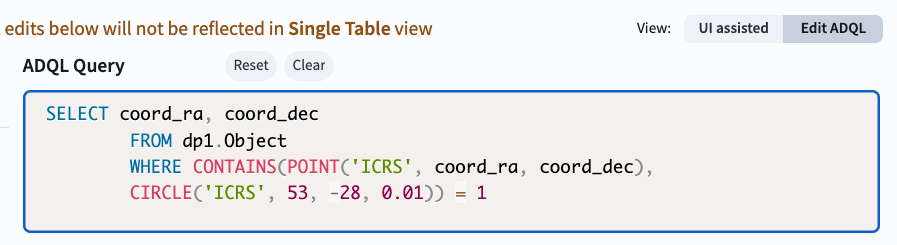

</div>

> Figure 1: The ADQL statement entered into the ADQL query box in the Portal Aspect.

In the Portal, click on the "Job Monitor" tab to see a list of all recent jobs. 

In the Job Monitor, click on the "information" icon in the top row (most recent job) - it is the letter "i" in a circle. The following pop-up will appear, and the job URL is at the bottom.

<div style="max-width:400px;margin-right: auto; margin-right: 0;">
    
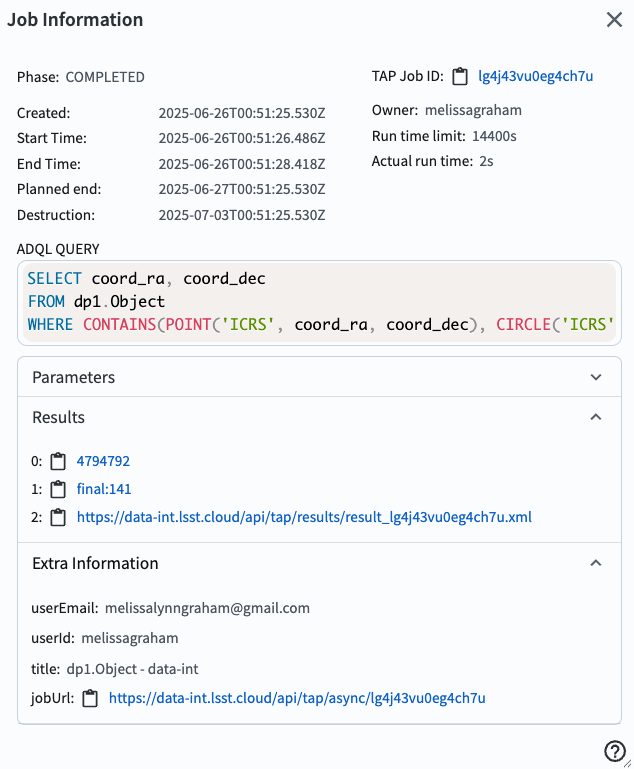

</div>

> Figure 2: The pop-up window of job information. This pop-up window will also appear by clicking on the "information" icon above the table in the Portal's Result tab.

### 3.1. Retrieve data from a Portal job URL

Click on the clipboard icon next to `jobUrl` to copy the URL.

Paste the job URL into the empty string in the cell below to define `job_url`.

Uncomment the lines and execute the cell to retrieve the results.

In [ ]:
# job_url = ''
# retrieved_job = retrieve_query(job_url)
# retrieved_results = retrieved_job.fetch_result().to_table().to_pandas()
# print(len(retrieved_results))